# Driving styles and car type

In [1]:
import os
os.chdir('../data')

In [2]:
import scipy
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM

In [26]:
driving_data = pd.read_csv("input/results-survey528393.csv")

In [27]:
print("Driving data", driving_data.shape)

Driving data (43, 334)


In [28]:
driving_data["condition"].value_counts()

2    15
1    15
3    13
Name: condition, dtype: int64

## Preprocessing

Get results from the driving style scale that each participant responded.

**TODO**: maybe group all agg and all def. Then group all fam and sports.

In [29]:
# group column names of aggressive and defensive conditions.
aggressive = driving_data.columns[driving_data.columns.str.fullmatch("agg[^2]+\[SQ00[1-2]\]")]
aggressive2 = driving_data.columns[driving_data.columns.str.fullmatch("agg.+2\[SQ00[1-2]\]")]

defensive = driving_data.columns[driving_data.columns.str.fullmatch("def[^2]+\[SQ00[1-2]\]")]
defensive2 = driving_data.columns[driving_data.columns.str.fullmatch("def.+2\[SQ00[1-2]\]")]

In [30]:
aggressive

Index(['aggpassenger[SQ001]', 'aggpassenger[SQ002]', 'aggdriver[SQ001]',
       'aggdriver[SQ002]', 'aggrural[SQ001]', 'aggrural[SQ002]',
       'aggurban[SQ001]', 'aggurban[SQ002]', 'aggfamily[SQ001]',
       'aggfamily[SQ002]', 'aggsports[SQ001]', 'aggsports[SQ002]'],
      dtype='object')

In [31]:
driving_data.loc[:, "aggmean"] = driving_data.loc[:, aggressive].mean(axis=1)
driving_data.loc[:, "aggmean2"] = driving_data.loc[:, aggressive2].mean(axis=1)
driving_data.loc[:, "defmean"] = driving_data.loc[:, defensive].mean(axis=1)
driving_data.loc[:, "defmean2"] = driving_data.loc[:, defensive2].mean(axis=1)

driving_data.loc[:, "aggressive"] = driving_data.loc[:, ["aggmean", "aggmean2"]].mean(axis=1)    # it is called "assertive" in Yusof's paper.
driving_data.loc[:, "defensive"] = driving_data.loc[:, ["defmean", "defmean2"]].mean(axis=1)

In [32]:
# split car types
family = driving_data.columns[driving_data.columns.str.fullmatch("(agg|def)fam[^2]+\[SQ00[1-2]\]")]
sports = driving_data.columns[driving_data.columns.str.fullmatch("(agg|def)sports[^2]+\[SQ00[1-2]\]")]

In [33]:
# keep only condition = 3, which explores car type
car_type_data = driving_data[driving_data["condition"] == 3]

# drop irrelevant columns
car_type_data = car_type_data.dropna(axis=1, how="all")


In [34]:
driving_data.to_pickle("working/driving_data.pkl")
car_type_data.to_pickle("working/car_type_data.pkl")


## Descriptive statistics

In [35]:
descriptive_columns = [
    "drivingxpcat",     # driving in the last 12 months
    "educationyears",
    "age",
    "gender",
    "drivingxp",        # years of experience driving cars
    "educationlevel",
]

In [36]:
driving_descriptive_data = driving_data[descriptive_columns]
car_type_descriptive_data = car_type_data[descriptive_columns]

In [37]:
car_type_descriptive_data.shape

(13, 6)

### Whole data

In [38]:
print("Driving descriptive data", driving_descriptive_data.shape, "\n")
for nominal_column in ["drivingxpcat", "gender", "educationlevel"]:
    print(driving_descriptive_data[nominal_column].value_counts(normalize=True), "\n")

Driving descriptive data (43, 6) 

Almost daily.              0.418605
Once a week.               0.232558
Less than once a month.    0.162791
Not at all.                0.139535
Once a month.              0.046512
Name: drivingxpcat, dtype: float64 

Female               0.581395
Male                 0.372093
Prefer not to say    0.046512
Name: gender, dtype: float64 

Bachelor degree                                                         0.534884
Masters/Diploma degree                                                  0.209302
University entrance school qualification, e.g. Abitur/Hochschulreife    0.093023
Doctoral degree                                                         0.093023
Vocational training/Berufsausbildung                                    0.069767
Name: educationlevel, dtype: float64 



In [39]:
driving_descriptive_data.describe()

,educationyears,age,drivingxp
count,43.000000,41.000000,43.000000
mean,18.279070,31.512195,12.767442
std,3.627446,11.225244,11.757140
min,9.000000,21.000000,1.000000
25%,16.000000,25.000000,5.000000
50%,18.000000,27.000000,10.000000
75%,20.000000,32.000000,15.000000
max,30.000000,63.000000,46.000000


### Car type condition

In [40]:
print("Descriptive data of car type condition", car_type_descriptive_data.shape, "\n")
for nominal_column in ["drivingxpcat", "gender", "educationlevel"]:
    print(car_type_descriptive_data[nominal_column].value_counts(normalize=True), "\n")

Descriptive data of car type condition (13, 6) 

Less than once a month.    0.384615
Once a week.               0.307692
Not at all.                0.153846
Almost daily.              0.076923
Once a month.              0.076923
Name: drivingxpcat, dtype: float64 

Female    0.615385
Male      0.384615
Name: gender, dtype: float64 

Bachelor degree                         0.692308
Masters/Diploma degree                  0.230769
Vocational training/Berufsausbildung    0.076923
Name: educationlevel, dtype: float64 



In [41]:
car_type_descriptive_data.describe()

,educationyears,age,drivingxp
count,13.000000,12.000000,13.000000
mean,16.923077,28.833333,9.000000
std,2.361551,9.962049,10.824355
min,12.000000,21.000000,1.000000
25%,16.000000,24.000000,2.000000
50%,18.000000,26.000000,5.000000
75%,18.000000,28.500000,10.000000
max,20.000000,59.000000,41.000000


In [42]:
car_type_descriptive_data["age"].value_counts().sort_index()

21.0    1
23.0    1
24.0    2
26.0    3
27.0    1
28.0    1
30.0    1
32.0    1
59.0    1
Name: age, dtype: int64

In [60]:
# make car type data usable for JASP
columns = ["aggressive", "defensive"]
jasp = pd.melt(car_type_data[["id"] + columns], id_vars="id", var_name="driving_style", value_name="rating")
jasp.to_csv("working/cartype_jasp.csv", index=False)

## Results

Comparing ratings of aggressive/defensive driving behaviours.

First comparing means for the whole data.

Then comparing means for the car type condition.

We used independent samples t-test for both comparisons.

In [43]:
driving_data = pd.read_pickle("working/driving_data.pkl")
car_type_data = pd.read_pickle("working/car_type_data.pkl")

In [52]:
# perform t test on driving data
pg.ttest(driving_data["aggressive"], driving_data["defensive"], alternative="greater")
# pg.ttest(driving_data["aggressive"], driving_data["defensive"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.091332,84,greater,0.463723,"[-0.25, inf]",0.019697,0.452,0.060062


In [48]:
driving_data["aggressive"].mean() - driving_data["defensive"].mean()

0.014534883720930036

In [46]:
# perform t test on car_type_data
pg.ttest(car_type_data["aggressive"], car_type_data["defensive"], alternative="greater")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.559925,24,greater,0.70964,"[-0.58, inf]",0.219621,0.815,0.014287


In [53]:
car_type_data.to_csv("working/car_type_data.csv", index=False)

In [ ]:
# confidence interval of paired t-test
"difference in means +- t(n-1, 0.05) * se(mean) / sqrt(n)"


def t_ci(data, alpha=0.05):
    t, p = scipy.stats.ttest_rel(data[0], data[1])
    ci = scipy.stats.t.ppf(1-alpha/2, np.abs(t))    # is this the same? (automatically generated)
    return ci

# modify this
def confidence_interval_bar(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    error_bar = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return error_bar

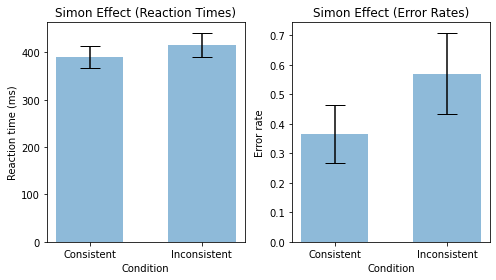

In [ ]:
# Build the plot
figure, axis = plt.subplots(1, 2, figsize=(7, 4))

# Reaction times
consistent_mean = np.mean(reaction_times["NC"])
inconsistent_mean = np.mean(reaction_times["NI"])

consistent_std = np.std(reaction_times["NC"])
inconsistent_std = np.std(reaction_times["NI"])

conditions = ["Consistent", "Inconsistent"]
x_pos = np.arange(len(conditions))
CTEs = [consistent_mean, inconsistent_mean]
error = [confidence_interval_bar(reaction_times["NC"]), confidence_interval_bar(reaction_times["NI"])]

axis[0].bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.6)
axis[0].set_xlabel('Condition')
axis[0].set_ylabel('Reaction time (ms)')
axis[0].set_xticks(x_pos)
axis[0].set_xticklabels(conditions)
axis[0].set_title('Simon Effect (Reaction Times)')

# Error rates
consistent_mean = np.mean(error_rates["NC"])
inconsistent_mean = np.mean(error_rates["NI"])

consistent_std = np.std(error_rates["NC"])
inconsistent_std = np.std(error_rates["NI"])

conditions = ["Consistent", "Inconsistent"]
x_pos = np.arange(len(conditions))
CTEs = [consistent_mean, inconsistent_mean]
error = [confidence_interval_bar(error_rates["NC"]), confidence_interval_bar(error_rates["NI"])]

axis[1].bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.6)
axis[1].set_xlabel('Condition')
axis[1].set_ylabel('Error rate')
axis[1].set_xticks(x_pos)
axis[1].set_xticklabels(conditions)
axis[1].set_title('Simon Effect (Error Rates)')

plt.tight_layout()
plt.show()

## Repeated measures ANOVA??

In [ ]:
# unpivot dataframes
reaction_times = pd.melt(reaction_times, id_vars=["subject"], value_vars=["NC", "NI"])
error_rates = pd.melt(error_rates, id_vars=["subject"], value_vars=["NC", "NI"])
reaction_times.sample(5)

,subject,variable,value
4,5,NC,376.979452
18,8,NI,375.634328
16,6,NI,448.746154
15,5,NI,413.185714
17,7,NI,462.722628


In [ ]:
print("Reaction times:")
print(AnovaRM(data=reaction_times, depvar="value", subject="subject", within=['variable']).fit())
print("Error rates:")
print(AnovaRM(data=error_rates, depvar="value", subject="subject", within=['variable']).fit())

Reaction times:
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable 21.8033 1.0000 10.0000 0.0009

Error rates:
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable 14.5310 1.0000 10.0000 0.0034

